## Analizy epidemiologiczne i prognozy medyczne 
Projekt grupowy: Agata, Katarzyna, Piotr

**<center>PROJEKT 3- prognoza rozwoju pandemii koronawirusa w Polsce na podstawie modelu SIR</center>**
Model SIR opisuje rozwój epidemii. Populację dzielimy na 3 grupy: osobników podatnych, zainfekowanych i uodpornionych na infekcję. Uwzględniamy rozrodzczość i śmiertelność, które równoważą się. Liczebność populacji jest zatem stała i równa $N$. Bierzemy pod uwagę również szczepienia. Model opisany jest trzema następującymi równaniami różniczkowymi:
$$\frac {dS}{dt}=(1-p)\mu-\alpha SI-\mu S$$
$$\frac {dI}{dt}=\alpha SI-\gamma I-\mu I$$
$$\frac {dR}{dt}=p\mu+\gamma I-\mu R,$$
gdzie 
<ul>
    <li> S(t)- frakcja osobników podatnych, </li>
    <li> I(t)- frakcja osobników zainfekowanych, </li>
    <li> R(t)- frakcja osobników uodpornionych,</li>
    S(t)+I(t)+R(t)=1
    <li> $\mu$ - współczynnik rozrodczości, współczynnik śmiertelności (stały), </li>
     <li> $\alpha$- tempo rozprzestrzeniania się infekcji, </li>
     <li> $\gamma$- współczynnik zdrowienia osobników zainfekowanych, </li>
    <li> p- współczynnik szczepień. </li> </ul>

Podany model jest w postaci zdormalizowanej, gdzie liczebność danej grupy dzielimy przez wielkość populacji, otrzymując frakcję.

Modelu SIR użyjemy, aby zaprognozować rozwój pandemii koronawirusa w Polsce. W tym celu na podstawie dostępnych danych dobieramy odpowiednie parametry i warunki początkowe.
Warunki początkowe zostały wyliczone na podstawie oficjalnych statystyk na dzień 1.06.2021 r. Dodatkowo przy wyliczeniu frakcji odpornych zakładamyże 50% ozdrowieńców się zaszczepiła i szczepionka daje odporność w 80% (zatem $R$ traktujemy jako grupę w 100% odporną). Szczegółowe obliczenia są zawarte w arkuszu pod linkiem załączonym na końcu.
Parametry $p$ i $\mu$ zostały wyliczone j.w. natomiast parametry $\alpha$ i $\gamma$ pochodzą z artykułu pod linkiem https://www.sciencedirect.com/science/article/pii/S0960077921000357?fbclid=IwAR3kQPBAyNmFsjQ5NYnkFuSDahe7OhV5ZXe_2OCsAJMtWEyLPO7c7S0yGf8 i zostały nieznacznie zmodyfikowane. 

W tym programie dokonamy predykcji liczby aktywnych przypadków (liczba zakażonych $S$) covid-19 w Polsce w dniach 2-22 czerwca. Dodatkowo porównamy część tych przewidywań z rzeczywistymi danymi.

In [1]:
import scipy.integrate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#zdefiniowanie modelu - układu równań różniczkowych
def model(y,t,p,mu,alpha,gamma):
    S,I,R=y
    dSdt = (1-p)*mu-alpha*S*I-mu*S
    dIdt = alpha*S*I-gamma*I-mu*I
    dRdt = p*mu+gamma*I-mu*R
    return ([dSdt, dIdt, dRdt])

In [3]:
#warunki początkowe I=158328, R=6947353, S=30864319

N = 37970000 #liczba ludności w Polsce
I0 = 0.004169818278
S0 = 0.812860661
R0 = 0.1829695207

# wspołczynniki
p = 0.007900974454  #średnia dzienna liczba szczepień dzielona przez N
mu = 0.0000302330  #dzienna śmiertelność w Polsce dzielona przez N

#współczynniki wzięte ze strony https://www.sciencedirect.com/science/article/pii/S0960077921000357?fbclid=IwAR3kQPBAyNmFsjQ5NYnkFuSDahe7OhV5ZXe_2OCsAJMtWEyLPO7c7S0yGf8
#dla Włoch z okresu sierpień (nieznacznie zmienione)
alpha = 0.0159
gamma = 0.0153

#rozwiązanie układu równań różniczkowych 
t = np.linspace(0, 21, 22)
solution=scipy.integrate.odeint(model,[S0,I0,R0],t,args=(p,mu,alpha,gamma))
solution=np.array(solution)

Wykonamy także wykres rozwiązań. Ze względu na duże różnice w liczebności w grupach i stosunkowo nieduże przyrosty na krótkim okresie, wykres nie jest zbyt czytelny i ciężko wysnuć z niego jakieś wnioski.

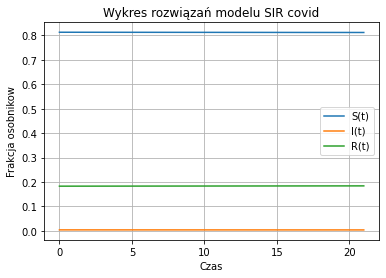

In [4]:
plt.figure(figsize=[6,4])
plt.plot(t,solution[:,0],label="S(t)")
plt.plot(t,solution[:,1],label="I(t)")
plt.plot(t,solution[:,2],label="R(t)")
plt.grid()
plt.legend()
plt.xlabel("Czas")
plt.ylabel("Frakcja osobnikow")
plt.title("Wykres rozwiązań modelu SIR covid")
plt.show()


Rozdzielamy rozwiązania na 3 wykresy, by zobaczyć dynamikę zmian w grupach. Tym razem można zaobserwować spadek liczby osobników podatnych i zainfekowanych, oraz wzrost liczby osobników uodpornionych.

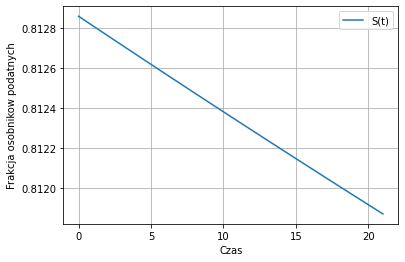

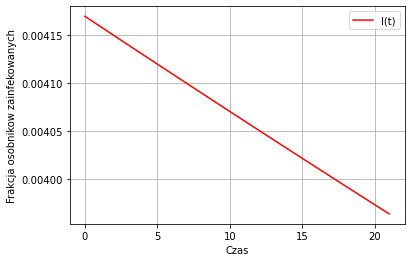

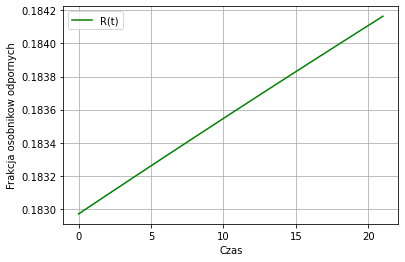

In [5]:

plt.figure(figsize=[6,4])
plt.plot(t,solution[:,0],label="S(t)")
plt.grid()
plt.legend()
plt.xlabel("Czas")
plt.ylabel("Frakcja osobnikow podatnych")
plt.show()

plt.figure(figsize=[6,4])
plt.plot(t,solution[:,1],label="I(t)", color="red")
plt.grid()
plt.legend()
plt.xlabel("Czas")
plt.ylabel("Frakcja osobnikow zainfekowanych")
plt.show()

plt.figure(figsize=[6,4])
plt.plot(t,solution[:,2],label="R(t)", color="green")
plt.grid()
plt.legend()
plt.xlabel("Czas")
plt.ylabel("Frakcja osobnikow odpornych")
plt.show()


Nasze wyliczone z modelu dane zaokrąglamy i umieszczamy w tabeli.

In [6]:
S,I,R=solution.T
df=pd.DataFrame({
    'Liczba podatnych':map(round,S*N),
    'Liczba zainfekowanych':map(round,I*N),
    'Liczba uodpornionych':map(round,R*N),
    'Data':np.arange('2021-06-01', '2021-06-23', dtype='datetime64[D]'),
})
df


,Liczba podatnych,Liczba zainfekowanych,Liczba uodpornionych,Data
0,30864319,158328,6947353,2021-06-01
1,30862481,157947,6949571,2021-06-02
2,30860648,157568,6951784,2021-06-03
3,30858821,157189,6953991,2021-06-04
4,30856998,156811,6956191,2021-06-05
5,30855180,156433,6958387,2021-06-06
6,30853367,156057,6960576,2021-06-07
7,30851560,155681,6962759,2021-06-08
8,30849757,155306,6964937,2021-06-09
9,30847960,154932,6967108,2021-06-10


Przedstawiamy prognozowaną liczbę przypadków aktywnych (zainfekowanych $S$ z naszego modelu) i zestawimy je z rzeczywistymi danymi, które są dostępne na dzień 12.06.2021r.

In [7]:
zainfekowani = pd.DataFrame({
    'Liczba zainfekowanych wg danych zewznętrznych':[158328,158392,157878,156985,156400,155822,155279,155122,155267,155113,154792,154462]+[None]*10
})

dane_prognozowane = pd.DataFrame(df, columns=["Data", "Liczba zainfekowanych"])
tab=pd.concat([dane_prognozowane, zainfekowani], axis=1)
tab

,Data,Liczba zainfekowanych,Liczba zainfekowanych wg danych zewznętrznych
0,2021-06-01,158328,158328.0
1,2021-06-02,157947,158392.0
2,2021-06-03,157568,157878.0
3,2021-06-04,157189,156985.0
4,2021-06-05,156811,156400.0
5,2021-06-06,156433,155822.0
6,2021-06-07,156057,155279.0
7,2021-06-08,155681,155122.0
8,2021-06-09,155306,155267.0
9,2021-06-10,154932,155113.0


Dla naszej predykcji wyliczamy procentowy błąd wyliczeń. Jak można zauważyć moduł błędu mieści się granicach 0.1-0.5%.

In [8]:
wyn=[0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(0,12):
    wyn[i]=(tab.iloc[i,1]-tab.iloc[i,2])/tab.iloc[i,2]
    print(round(wyn[i]*100,3))


0.0
-0.281
-0.196
0.13
0.263
0.392
0.501
0.36
0.025
-0.117
-0.151
-0.179


Ostateczne wnioski

Z modelu widać, że zakażenia będą spadać. Pod koniec czerwca grupa odpornych powinna przekroczyć 7 mln.

Dane przewidziane dość dobrze oddają rzeczywistość, co jest zauważalne przy zestawieniu z rzeczywistymi danymi.

Wykorzystywane źródła:
<ul>
    <li> wykłady przedmiotu "Analizy epidemiologiczne i prognozy medyczne", dr Agnieszka Bartłomiejczyk, Politechnika Gdańska </li>
    <li> arkusz z obliczeniami - https://docs.google.com/spreadsheets/d/1prPbRJQtV1UhIUi8wUg3pa3oK7e1CWpMdLI29kwfkcU/edit?usp=sharing </li>
    <li> rządowa strona z danymi - https://www.gov.pl/web/koronawirus/wykaz-zarazen-koronawirusem-sars-cov-2</li>
    <li> https://www.sciencedirect.com/science/article/pii/S0960077921000357?fbclid=IwAR3kQPBAyNmFsjQ5NYnkFuSDahe7OhV5ZXe_2OCsAJMtWEyLPO7c7S0yGf8 </li>
    <li> liczba zainfekowanych w ostatniej tabeli - https://koronawirusunas.pl/ </li>
    </ul>
